# Overview 

Please see the [homework policy](https://fa20.fdl.thecoatlessprofessor.com/syllabus/#homework)
for detailed instructions and some grading notes. Failure to follow instructions
will result in point reductions. 

> "The future depends on some graduate student who is deeply suspicious of everything I have said."
> 
> -- Geoffrey Hinton (One of Deep Learning's Godfathers)

## Grading

The rubric TAs will use to grade this assignment is:

| Task                                                   | Pts |
|:-------------------------------------------------------|----:|
| Meeting the Course Staff and HW Policy                 | 4   |
| Reviewing Past Knowledge                               | 10  |
| Activated                                              | 10  |
| I Spy Fashion.                                         | 10  |
| **Total**                                              | 34  |


## Objectives 

The objectives behind this homework assignment are as follows:

- Review mathematical operations;
- Implement functions in Python; and
- Training a neural network.

# Assignment - Homework 1
STAT 430 - FDL, Fall 2020

Due: **Thursday, September 10th, 2020 at 6:00 PM**

- **Author:** Mengchen(Jared) Qiu
- **NetID:** mqiu3

### Collaborators

If you worked with any other student in preparing these answers, please
make sure to list their full names and NetIDs 

- Student 1: `First and Last Name` (`NetID`)
- Student 2: `First and Last Name` (`NetID`)


In [ ]:
#@title (Hidden) Diagnostic Check
import os
import sys
import pandas as pd
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf

print(f"python: {sys.version}")
print(f"pandas: {np.__version__}")
print(f"tensorflow: {tf.__version__}")
# Detect if a GPU is present
gpus = tf.config.list_physical_devices('GPU')

if gpus:
  print(f"GPU Enabled: True")
else:
  print(f"GPU Enabled: False")

try:
  from google.colab import drive
  is_google_colab = True

  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is being run locally or through another source.")


UsageError: Line magic function `%tensorflow_version` not found.


## [4 points] Exercise 1: Homework Policy
Have questions on Exercise 1? Please ask at <https://campuswire.com/c/G9F0E3E38/feed/14>




### [2 Points] (a)

Please uncomment the following statement contained within this **exercise cell** when you have read and agreed
to the [homework policy](https://fa20.fdl.thecoatlessprofessor.com/syllabus/#homework/).

To _uncomment_ a statement in _text cell_, double click the _text cell_ and remove the `<!-- -->` surrounding the content.


I have read and agree to abide by the policies and procedures laid 
out by the [homework policy](https://fa20.fdl.thecoatlessprofessor.com/syllabus/#homework/).
                               
I understand that:

- I must independently write up solutions to homework problems.
    - Failure to do so will result in an academic integrity violation due to plagarism and more severe penalties.
- I must list the names of all collaborators that I work with at the top of my homework assignment.
- I understand that I can work with **at most** two other students in class. 
- I must supply my full name and netid at the top of the homework assignments.
- I will change the name of the Jupyter Notebook from `hwXX-assign.ipynb` to `hwXX-NetId.ipynb`.
- All code cells must be evaluated. 
- I will turn in my homework by uploading to Canvas.
    - There is no paper or e-mail turn-in available. 
- I understand that at 6:00 PM central time on the day the homework is due my ability to upload the assignment will be disabled
    - Any work not in the upload will _not_ be graded.
    - Any code cell not run, will not be graded.
- I will be able to drop **one** homework assignment over the course of the 
  semester. 
- I understand that any academic integrity violations (cheating or assisting others)
  will be punished to ensure a fair academic environment for all.

### [2 Points] (b)

Select one of the following office hours and visit the course staff! Ask a staff member a question and write down the response here. 

- James
  - Tuesday & Wednesday: 11 AM - 12 PM
  - https://illinois.zoom.us/j/97336966886?pwd=dTVLbGVpVFJlMEs3RkYzSUREYTNEQT09
- Yan
  - Tuesday: 7 PM - 8 PM
  - https://illinois.zoom.us/j/93344937028?pwd=b2lFTVZKdktlaFhraUU3V2JaZm4zUT09
- Sayan
  - Monday: 9 AM - 10 AM
  - https://illinois.zoom.us/j/92981852002?pwd=czZ4SU9WRjg0dkpKTzZPdUhybGUwdz09


- **Office Hour Visited:**Yan
- **Question:**I notice you interned in JP Morgan last summer as a machine learning engineer. I am personally pretty interested in like Data science/machine learning/quant research role in financial institution, which obviously all of them are highly related with statistics. My question is what kind skills you think are important to land a role like this? Is phd level theoretical stat course like 510/511/575 important for these kind of roles? Thank you.
- **Answer:** 575 definitly not necessary. But 510 and 511 are helpful to your career


## [10 Points] Exerise 2: Reviewing Past Knowledge

Have questions on Exercise 2? Please ask at <https://campuswire.com/c/G9F0E3E38/feed/15>



### [5 Points] (a) 

Consider the $p$-norm or $\mathcal{L}_p$ of a vector $\mathbf{x}$ given as 
$$\lVert \mathbf{x}\rVert_p = \left({\sum_{i=1}^{n} \lvert{ x_i^p}\rvert} \right)^{1/p} = \left({ \lvert{ x_1^p}\rvert + \lvert{ x_2^p}\rvert + \cdots + \lvert{ x_n^p}\rvert }\right)^{1/p},$$

where $p$ is a real number such that $p \ge 1$, $x_i$ refers to the $i$th location in vector $x$, and $\lvert x_i \rvert$ is absolute value of $x$ at element $i$.

Compute the $1$-norm ($\mathcal{L}_1$) and $2$-norm ($\mathcal{L}_2$) of the vector $\mathbf{a} = \left[-3, 5, 1\right]$

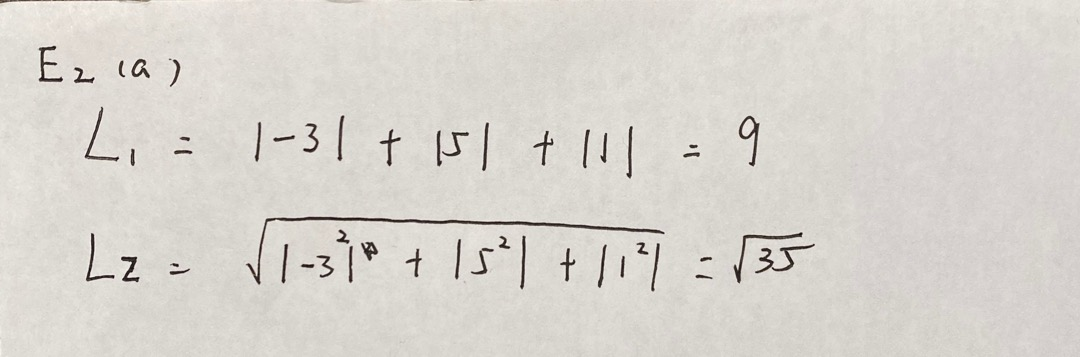

### [5 Points] (b)

Consider the following function: 

$$J(w) = \sum_{i=1}^{n}\left[{y_i \log\left(\frac{1}{1+\exp(-wx_i)}\right)} + {\left({1 - y_i}\right) \log\left(1 - \frac{1}{1+\exp(-wx_i)}\right)}\right]$$

Obtain its derivative with respect to $w$. 

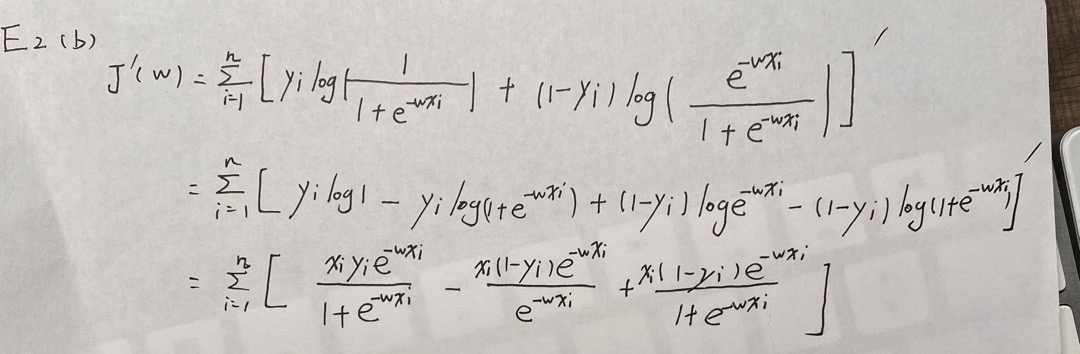... work here please ...


## [10 points] Exercise 3: Activated

Have questions on Exercise 1? Please ask at <https://campuswire.com/c/G9F0E3E38/feed/16>



### [5 points] (a)
During lecture, we claimed that the `tanh(x)` is underpinned by the sigmoid activation function. Given that:

$$
\begin{align}
\sigma(x) &= \frac{ e^x }{1 + e^x} = \frac{ 1 }{1 + e^{-x}} \\
\tanh(x) &= \frac{e^x – e^{-x}}{e^x + e^{-x}} 
\end{align}
$$

Show that:

$$\tanh(x) = 2 \sigma(2x) - 1$$


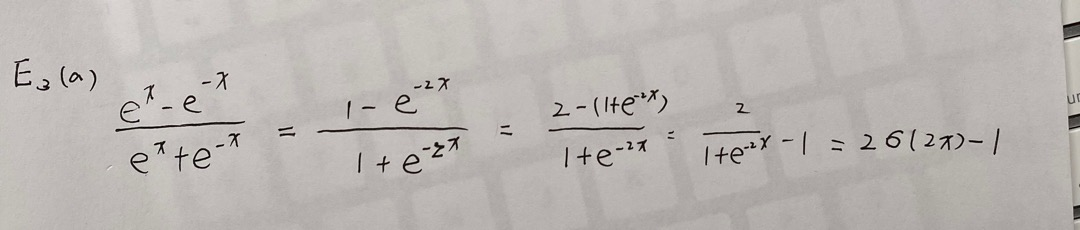

### [5 points] (b)
Consider the _Exponential Linear Unit_ ('ELU') activation function:

$$
g(x) = \begin{cases}
x, &\text{if } x > 0 \\
{\alpha(\exp x - 1)}, &\text{if } x \le 0 
\end{cases}
$$

with the requirement that $\alpha \ge 0$.

Develop an ELU function that operates on a list of numbers in `Python` using a `for` loop.

Implementation Guidelines:

- **Arguments:**
    - `x`: A `list` of values to "activate".
    - `alpha`: Scale for the negative factor.
- **Return:**
    - A `list` with each element "activated".

In [ ]:
import numpy as np
# Code
def elu(x, alpha):
  to_return = []
  for i in x:
    if (i > 0):
      to_return.append(i)
    else:
      to_return.append(alpha*(np.exp(i)-1))
  return to_return
elu([1,2,-1],1)

[1, 2, -0.6321205588285577]


## [10 points] Exercise 4: I Spy Fashion

Have questions on Exercise 1? Please ask at <https://campuswire.com/c/G9F0E3E38/feed/17>


Within the dense neural network lecture, we built our first neural network. However, we trained the model a single layer. That is, we didn't go "deep" with the number of layers. In this exercise, we're going to be going deep on the the MNIST Fashion data. 

Similar to the course notebook, we've handled setup for you. Labels for this data are as follows:

|Label |	Class          |
|:-----|:----------------|
| 0    |	T-shirt/top    |
| 1    |	Trouser        |
| 2    |	Pullover       |
| 3    |	Dress          |
| 4    |	Coat           |
| 5    |	Sandal         |
| 6    |	Shirt          |
| 7    |	Sneaker        |
| 8    |	Bag            |
| 9    |	Ankle boot     |



### [6 Points] (a)

Using the lecture example code [![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fdluiuc/lecture-notebooks/blob/master/02-dense-neural-network.ipynb), construct three different deep learning models for the `mnist_fashion` data set. Each model will have a different number of dense layers. Within each layer, we'll varying the number of neurons. Only on the output layer, will he hold the number of neurons to 10 so that predictions trained classes can be performed. Record the final accuracy and loss of from both the training and test data. 

In particular, please train the following models:

- **Model 1**: 1 layer with 128 neurons going to an output layer of 10 classes.
- **Model 2**: 2 layers with 128, 64 neurons going to an output layer of 10 classes.
- **Model 3**: 3 layers with 128, 64, 32 neurons going to an output layer of 10 classes.

Keep the optimization settings the same as the lecture model. 

In [ ]:
# Setup the Python Libraries
import numpy as np
import matplotlib.pyplot as plt
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

4423680/4422102 [==============================] - 0s 0us/step


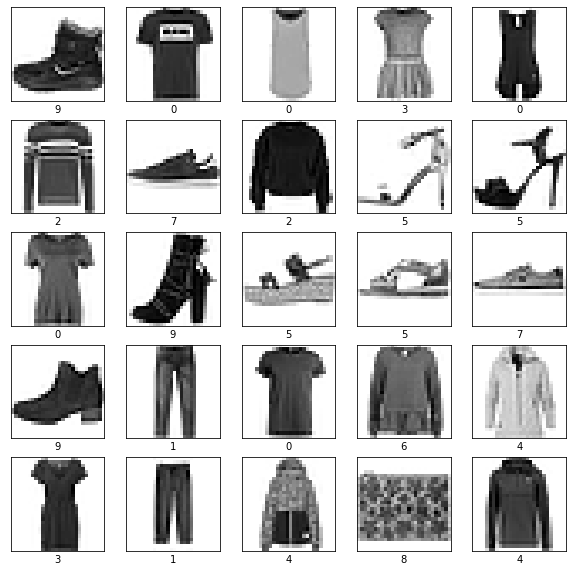

In [ ]:
#@title (Hidden) Fashion Data
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / np.float32(255)
x_test = x_test / np.float32(255)
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)
# Display 10 different samples from the training data set.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Ensure grayscale is used to avoid a high intensity color plot
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

Fashion data has been imported as:

- `x_train`: Images that should be used to train the model
- `y_train`: Labels corresponding to training images
- `x_test`:  Images that should be used to test the model performance
- `y_test`: Labels corresponding to test images

#### Model 1

In [ ]:
# Code
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
training_history = model.fit(x_train, y_train, 
                             epochs=10, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4985 - accuracy: 0.8238 - val_loss: 0.4411 - val_accuracy: 0.8389
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3779 - accuracy: 0.8640 - val_loss: 0.3892 - val_accuracy: 0.8616
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3368 - accuracy: 0.8763 - val_loss: 0.3765 - val_accuracy: 0.8602
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.8862 - val_loss: 0.3509 - val_accuracy: 0.8723
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.8917 - val_loss: 0.3575 - val_accuracy: 0.8732
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2795 - accuracy: 0.8966 - val_loss: 0.3442 - val_accuracy: 0.8769
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2658 - accuracy: 0.9023 - val_loss: 0.3621 - val_accuracy:

#### Model 2

In [ ]:
# Code
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])
model2.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
training_history = model2.fit(x_train, y_train, 
                             epochs=10, validation_data=(x_test, y_test))
test_loss, test_acc = model2.evaluate(x_test,  y_test, verbose=2)

print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4901 - accuracy: 0.8248 - val_loss: 0.4286 - val_accuracy: 0.8500
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3626 - accuracy: 0.8672 - val_loss: 0.3999 - val_accuracy: 0.8566
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3294 - accuracy: 0.8787 - val_loss: 0.3566 - val_accuracy: 0.8707
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3072 - accuracy: 0.8863 - val_loss: 0.3541 - val_accuracy: 0.8710
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2894 - accuracy: 0.8928 - val_loss: 0.3419 - val_accuracy: 0.8767
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2741 - accuracy: 0.8974 - val_loss: 0.3403 - val_accuracy: 0.8758
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2637 - accuracy: 0.9015 - val_loss: 0.3461 - val_accuracy:

#### Model 3

In [ ]:
# Code
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10)
])
model3.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
training_history = model3.fit(x_train, y_train, 
                             epochs=10, validation_data=(x_test, y_test))
test_loss, test_acc = model3.evaluate(x_test,  y_test, verbose=2)

print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5003 - accuracy: 0.8202 - val_loss: 0.4300 - val_accuracy: 0.8413
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3712 - accuracy: 0.8635 - val_loss: 0.4045 - val_accuracy: 0.8524
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3345 - accuracy: 0.8773 - val_loss: 0.3788 - val_accuracy: 0.8625
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3122 - accuracy: 0.8844 - val_loss: 0.3460 - val_accuracy: 0.8759
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.8894 - val_loss: 0.3531 - val_accuracy: 0.8716
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2808 - accuracy: 0.8950 - val_loss: 0.3507 - val_accuracy: 0.8735
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2712 - accuracy: 0.8985 - val_loss: 0.3390 - val_accuracy:

### [4 Points] (b) 

Describe what happened to the accuracy and loss of both the training and test data sets as the network gained depth by adding additional layers. Should the result be surprising or not?  


model1

Train loss: 0.2378  Train accuracy: 0.9118  Test loss: 0.3345 
Test accuracy: 0.8818

model2

Train loss: 0.2368  Train accuracy: 0.9115 Test loss: 0.3327 
Test accuracy: 0.8839

model3

Train loss: 0.2417  Train accuracy: 0.9082  Test loss: 0.3583
Test accuracy: 0.8718

The train accuracy decrease with the increasing of layers. The test accuracy first increase then decrease. Both suprised me a lot because i thought accuracy would increase with increasing of layers. Both train and test loss first decrease then increase. I thought they would decrease with the increasing of layers.